# Looping logic

In [2]:
from typing import TypedDict, Dict, List
import random
from langgraph.graph import StateGraph, START, END

In [3]:
class AgentState(TypedDict):
    name: str
    number: list[int]
    counter: int

In [14]:
def greeting_node(state: AgentState) -> AgentState:
    """greeting node which says hi"""
    state["name"] = f"hi there, {state['name']}"
    state["counter"] = 0

    return state

def random_node(state: AgentState) -> AgentState:
    """generate a random number from 0 to 10"""
    state["number"].append(random.randint(0, 10))
    state["counter"] += 1

    return state

def should_continue(state: AgentState) -> AgentState:
    """function to decide what to do next"""
    if state["counter"] < 5:
        print("entereing loop", state["counter"])
        return "loop"
    else:
        return "exit" 

In [15]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random_node", random_node)

graph.add_edge("greeting", "random_node")

graph.add_conditional_edges("random_node", should_continue, {
    "loop": "random_node",
    "exist": END
})


graph.set_entry_point("greeting")

In [16]:
app = graph.compile()

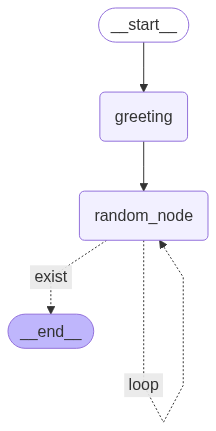

In [17]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
app.invoke({"name":"ayo", "number":[], "counter":0})

entereing loop 1
entereing loop 2
entereing loop 3
entereing loop 4


KeyError: 'exit'